In [3]:
import numpy as np
c = 4200
lamda01 = 1529
lamda02 = 1540
lamda1 = np.array([1529.808,1529.807,1529.813,1529.812,1529.814,1529.809])
lamda2 = np.array([1541.095,1541.092,1541.090,1541.093,1541.094,1541.091])
# 曲率
k1 = c*(lamda1 - lamda01)/(lamda01)
k2 = c*(lamda2 - lamda02)/(lamda02)
k1,k2

(array([2.21948986, 2.21674297, 2.23322433, 2.23047744, 2.23597122,
        2.22223676]),
 array([2.98636364, 2.97818182, 2.97272727, 2.98090909, 2.98363636,
        2.97545455]))

In [6]:
# 对曲率进行积分，估算每个传感器点处的光纤位置
initial_angle = np.pi/4
spacing = 0.6   # 传感器间距
n_sensors = len(k1)

def integrate_positions(curvatures,initial_angle,spacing,n_sensors):
    angles = np.zeros(n_sensors)        # 角度
    x_positions = np.zeros(n_sensors)   # x坐标
    y_positions = np.zeros(n_sensors)   # y坐标
    
    # 初始位置
    x_positions[0] = spacing * np.cos(initial_angle)
    y_positions[0] = spacing * np.sin(initial_angle)
    angles[0] = initial_angle + curvatures[0] * spacing

    for i in range(1,n_sensors):
        angles[i] = angles[i-1] + curvatures[i] * spacing
        x_positions[i] = x_positions[i-1] + spacing * np.cos(angles[i])
        y_positions[i] = y_positions[i-1] + spacing * np.sin(angles[i])

    return x_positions,y_positions,angles

# 计算两次测试的光纤位置
x_positions_1,y_positions_1,angles_1 = integrate_positions(k1,initial_angle,spacing,n_sensors)
x_positions_2,y_positions_2,angles_2 = integrate_positions(k2,initial_angle,spacing,n_sensors)
x_positions_1,y_positions_1,x_positions_2,y_positions_2

(array([ 0.42426407, -0.14794578, -0.10317734,  0.48936541,  0.71583481,
         0.22907945]),
 array([ 0.42426407,  0.24377616, -0.35455133, -0.44885452,  0.10676371,
         0.45757594]),
 array([0.42426407, 0.2195044 , 0.81401095, 0.76467135, 0.1917737 ,
        0.48791449]),
 array([ 0.42426407, -0.13971597, -0.22072194,  0.37724596,  0.19895328,
        -0.32287105]))

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False 

In [9]:
import numpy as np
from scipy.interpolate import interp1d

test1_coordinates = {
    "FBG1":(x_positions_1[0],y_positions_1[0]),
    "FBG2":(x_positions_1[1],y_positions_1[1]),
    "FBG3":(x_positions_1[2],y_positions_1[2]),
    "FBG4":(x_positions_1[3],y_positions_1[3]),
    "FBG5":(x_positions_1[4],y_positions_1[4]),
    "FBG6":(x_positions_1[5],y_positions_1[5])
}

test2_coordinates = {
    "FBG1":(x_positions_2[0],y_positions_2[0]),
    "FBG2":(x_positions_2[1],y_positions_2[1]),
    "FBG3":(x_positions_2[2],y_positions_2[2]),
    "FBG4":(x_positions_2[3],y_positions_2[3]),
    "FBG5":(x_positions_2[4],y_positions_2[4]),
    "FBG6":(x_positions_2[5],y_positions_2[5])
}


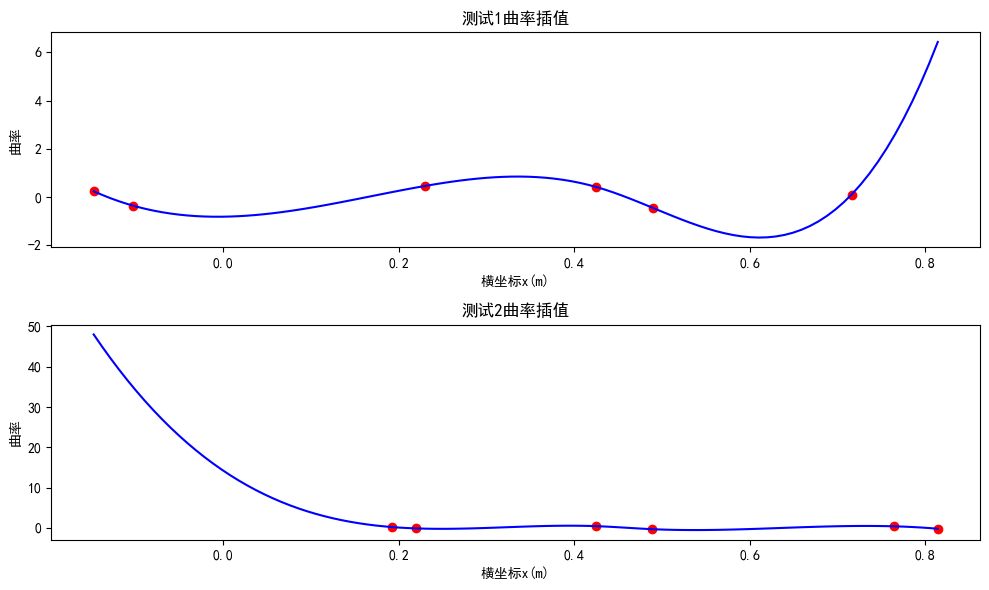

In [10]:
# 将坐标数据拆分为x和y坐标
test1_x = np.array([coord[0] for coord in test1_coordinates.values()])
test1_y = np.array([coord[1] for coord in test1_coordinates.values()])

test2_x = np.array([coord[0] for coord in test2_coordinates.values()])
test2_y = np.array([coord[1] for coord in test2_coordinates.values()])

# 创建插值函数
test1_interp_func = interp1d(test1_x,test1_y,kind='cubic',bounds_error=False,fill_value='extrapolate')
test2_interp_func = interp1d(test2_x,test2_y,kind='cubic',bounds_error=False,fill_value='extrapolate')

# 定义横坐标范围
x_min = min(np.min(test1_x),np.min(test2_x))
x_max = max(np.max(test1_x),np.max(test2_x))
x_values = np.linspace(x_min,x_max,100)

# 计算测试1,2的曲率
test1_curvature = test1_interp_func(x_values)
test2_curvature = test2_interp_func(x_values)

plt.figure(figsize=(10,6))

plt.subplot(2,1,1)
plt.plot(test1_x,test1_y,'ro',label='测试1坐标点')
plt.plot(x_values,test1_curvature,'b-',label='测试1曲率')
plt.title('测试1曲率插值')
plt.xlabel('横坐标x(m)')
plt.ylabel('曲率')
plt.legend

plt.subplot(2,1,2)
plt.plot(test2_x,test2_y,'ro',label='测试2坐标点')
plt.plot(x_values,test2_curvature,'b-',label='测试2曲率')
plt.title('测试2曲率插值')
plt.xlabel('横坐标x(m)')
plt.ylabel('曲率')
plt.legend

plt.tight_layout()
plt.show()

In [12]:
import pandas as pd
test1_predicted_curvature = test1_interp_func(np.array([0.3,0.4,0.5,0.6,0.7]))
test2_predicted_curvature = test2_interp_func(np.array([0.3,0.4,0.5,0.6,0.7]))

df = pd.DataFrame({
    '横坐标x(m)':[0.3,0.4,0.5,0.6,0.7],
    '测试1曲率k':test1_predicted_curvature,
    '测试2曲率k':test2_predicted_curvature
})
df

,横坐标x(m),测试1曲率k,测试2曲率k
0,0.3,0.799141,-0.022437
1,0.4,0.634233,0.529972
2,0.5,-0.608527,-0.424915
3,0.6,-1.663315,-0.296810
4,0.7,-0.435595,0.399620
